<font size="20">Libraries</font> 

In [15]:
# working directory management
import os

# math
import numpy as np
import statsmodels.api as sm

#dataframe
import pandas as pd

# graphical
import matplotlib.pyplot as plt
import seaborn as sns

<font size="20">Working Directory</font> 

In [16]:
# determine current working directory (folder .ipynb file is in)

cwd = os.getcwd()
cwd

'C:\\Users\\Dono7\\Documents\\ActualDocuments\\School\\Grad\\MATH 5900 PIC Math\\Project'

In [17]:
# change working directory

os.chdir("C:\\Users\\Dono7\\Documents\\ActualDocuments\\School\\Grad\\MATH 5900 PIC Math\\Project")
#os.chdir("/Users/sethketron/Documents/ActualDocuments/School/Grad/Fall 20 - Spring 21/Fall/MATH 5900 PIC Math/Project")

In [18]:
# files in working directory

os.listdir('.')

['.ipynb_checkpoints',
 'agebox.png',
 'agerangelinear.png',
 'agerangenocap.png',
 'agerangetree.png',
 'Balladdiabetes.R',
 'BalladProject.ipynb',
 'ChangeA1c.twb',
 'controlmovementsss.png',
 'controltree.png',
 'Diabetes Program for PICMath Final.xlsx',
 'diabetesdat.csv',
 'GroupMovement.twb',
 'increasedecreasetree.png',
 'movementnocap.png',
 'percentchange.png',
 'ProjectSelection_and_Overviews',
 'Screen Shot 2020-11-17 at 9.33.02 PM.png',
 'Screen Shot 2020-11-17 at 9.34.04 PM.png',
 'Screen Shot 2020-11-17 at 9.34.47 PM.png',
 'Screen Shot 2020-11-17 at 9.35.57 PM.png',
 'urbanruralnocap.png',
 'urbanruraltree.png']

<font size="20">Importing Data</font> 

In [19]:
# read in excel file as pandas dataframe
# set max print options so can print the whole dataframe

diabetes = pd.read_excel (r'C:\\Users\\Dono7\\Documents\\ActualDocuments\\School\\Grad\\MATH 5900 PIC Math\\Project\\Diabetes Program for PICMath Final.xlsx')

In [20]:
# changing the column names from default to value of 0 row

diabetes.columns = diabetes.iloc[0]
diabetes.columns

Index(['Member ID', 'Urban or Rural', 'Age', 'HeartDisease 2020',
       'Diabetes 2020', 'EmotionalHealth 2020', 'Cancer 2020',
       'WholeHealthIndex 2020', 'HealthAwarenessIndex 2020',
       'BiometricIndex 2020',
       ...
       'Net Pay Rx January 2020', 'Net Pay Rx Diabetes Drugs January 2020',
       'Net Pay Med January 2020', 'Net Pay Med Epis Diabetes January 2020',
       'Admits January 2020', 'Admits Acute Diabetes January 2020',
       'Visits ER January 2020', 'Visits ER Diabetes January 2020',
       'Avoidable Admits Acute January 2020',
       'Avoidable Admits Acute Diabetes January 2020'],
      dtype='object', name=0, length=303)

In [21]:
# dropping 0 row, data now starts indexing at 1

diabetes = diabetes.drop([0])

In [22]:
# first five columns of new data after dropping 0 row

pd.set_option("display.max_rows", None, "display.max_columns", None)

<font size="20">Data Cleaning (Data Type, Coding New Variables, Missing data)</font> 

In [23]:
# determining data types 

diabetes.dtypes

0
Member ID                                         object
Urban or Rural                                    object
Age                                               object
HeartDisease 2020                                 object
Diabetes 2020                                     object
EmotionalHealth 2020                              object
Cancer 2020                                       object
WholeHealthIndex 2020                             object
HealthAwarenessIndex 2020                         object
BiometricIndex 2020                               object
FinancialHealthIndex 2020                         object
AlcoholUse 2020                                   object
MedicalAdherence 2020                             object
Nutrition 2020                                    object
PhysicalActivity 2020                             object
TobaccoUse 2020                                   object
WeightManagement 2020                             object
Depression 2020              

In [24]:
diabetes.shape

(664, 303)

In [25]:
# changing DATA TYPES for all features except Urban or Rural to numeric data types

diabetes[[i for i in list(diabetes.columns) if i != 'Urban or Rural']] = diabetes[[i for i in list(diabetes.columns) if i != 'Urban or Rural']].apply(pd.to_numeric) 

In [26]:
# changing DATA TYPE for Urban or Rural to categorical type 

diabetes["Urban or Rural"] = diabetes["Urban or Rural"].astype('category')

In [27]:
# encoding Urban or Rural feature into dummy variable (0 - Rural, 1 - Urban)

diabetes["Urban or Rural dummy"] = diabetes["Urban or Rural"].cat.codes

In [28]:
# Moving urban rural dummy variable column next to Urban or Rural column

dummy="Urban or Rural dummy"
Geog = diabetes.pop(dummy)
diabetes.insert(2, dummy, Geog)

In [29]:
# changing data type for Coaching Sessions to categorical type

diabetes[["Coaching Session Quarter 1 FY20", "Coaching Session Quarter 2 FY20", "Coaching Session Quarter 3 FY20", "Coaching Session Quarter 4 FY20", "Coaching Session Quarter 3 FY19", "Coaching Session Quarter 4 FY19"]] = diabetes[["Coaching Session Quarter 1 FY20", "Coaching Session Quarter 2 FY20", "Coaching Session Quarter 3 FY20", "Coaching Session Quarter 4 FY20", "Coaching Session Quarter 3 FY19", "Coaching Session Quarter 4 FY19"]].astype('category')



Looking at missing data

In [30]:
# determines the number of missing values per each column (total number of values for each feature is 664).

diabetes.isnull().sum()

0
Member ID                                           0
Urban or Rural                                      0
Urban or Rural dummy                                0
Age                                                 0
HeartDisease 2020                                   0
Diabetes 2020                                       0
EmotionalHealth 2020                                0
Cancer 2020                                         0
WholeHealthIndex 2020                               0
HealthAwarenessIndex 2020                           0
BiometricIndex 2020                                 2
FinancialHealthIndex 2020                           3
AlcoholUse 2020                                     0
MedicalAdherence 2020                               1
Nutrition 2020                                      0
PhysicalActivity 2020                               0
TobaccoUse 2020                                     0
WeightManagement 2020                               0
Depression 2020           

In [31]:
# requires column to have at least 175 non-NA values

# diabetes = diabetes.dropna(thresh=175, axis=1)

In [33]:
diabetes.isnull().sum()

0
Member ID                                           0
Urban or Rural                                      0
Urban or Rural dummy                                0
Age                                                 0
HeartDisease 2020                                   0
Diabetes 2020                                       0
EmotionalHealth 2020                                0
Cancer 2020                                         0
WholeHealthIndex 2020                               0
HealthAwarenessIndex 2020                           0
BiometricIndex 2020                                 2
FinancialHealthIndex 2020                           3
AlcoholUse 2020                                     0
MedicalAdherence 2020                               1
Nutrition 2020                                      0
PhysicalActivity 2020                               0
TobaccoUse 2020                                     0
WeightManagement 2020                               0
Depression 2020           

Categorizing features ... for Total Health Analysis

In [34]:
diabetes['Age'].min()

24

In [35]:
diabetes['Age'].max()

78

In [36]:
agebins = [0, 30, 40, 50, 60, 70]
agenames = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']

dAge = dict(enumerate(agenames, 1))

In [37]:
diabetes['Age Range'] = np.vectorize(dAge.get)(np.digitize(diabetes['Age'], agebins))

In [38]:
dummy1="Age Range"
loc = diabetes.pop(dummy1)
diabetes.insert(3, dummy1, loc)

In [39]:
diabetes["Age Range"] = diabetes["Age Range"].astype('category')

In [40]:
diabetes['Age Range'].value_counts()

50-59    273
60-69    226
40-49    107
30-39     36
70+       16
20-29      6
Name: Age Range, dtype: int64

2020 Risk features

HeartDisease 2020 Risk

In [42]:
heartbins = [0, 34, 71]
heartnames = ['Low', 'Moderate', 'High']

dHeart = dict(enumerate(heartnames, 1))

In [43]:
diabetes['HeartDisease 2020 Risk'] = np.vectorize(dHeart.get)(np.digitize(diabetes['HeartDisease 2020'], heartbins))

In [44]:
dummy2="HeartDisease 2020 Risk"
loc1 = diabetes.pop(dummy2)
diabetes.insert(6, dummy2, loc1)

In [45]:

diabetes["HeartDisease 2020 Risk"] = diabetes["HeartDisease 2020 Risk"].astype('category')

Diabetes 2020 Risk

In [46]:
diabbins = [0, 34, 71]
diabnames = ['Low', 'Moderate', 'High']

dDiab = dict(enumerate(diabnames, 1))

In [47]:
diabetes['Diabetes 2020 Risk'] = np.vectorize(dDiab.get)(np.digitize(diabetes['Diabetes 2020'], diabbins))

In [48]:
dummy3="Diabetes 2020 Risk"
loc2 = diabetes.pop(dummy3)
diabetes.insert(8, dummy3, loc2)

In [49]:

diabetes["Diabetes 2020 Risk"] = diabetes["Diabetes 2020 Risk"].astype('category')

EmotionalHealth 2020 Risk

In [50]:
emotbins = [0, 34, 71]
emotnames = ['Low', 'Moderate', 'High']

dEmot = dict(enumerate(emotnames, 1))

In [51]:
diabetes['EmotionalHealth 2020 Risk'] = np.vectorize(dEmot.get)(np.digitize(diabetes['EmotionalHealth 2020'], emotbins))

In [52]:
dummy4="EmotionalHealth 2020 Risk"
loc3 = diabetes.pop(dummy4)
diabetes.insert(10, dummy4, loc3)

In [53]:

diabetes["EmotionalHealth 2020 Risk"] = diabetes["EmotionalHealth 2020 Risk"].astype('category')

Cancer 2020 Risk

In [54]:
cancbins = [0, 34, 71]
cancnames = ['Low', 'Moderate', 'High']

dCanc = dict(enumerate(cancnames, 1))

In [55]:
diabetes['Cancer 2020 Risk'] = np.vectorize(dCanc.get)(np.digitize(diabetes['Cancer 2020'], cancbins))

In [56]:
dummy5="Cancer 2020 Risk"
loc4 = diabetes.pop(dummy5)
diabetes.insert(12, dummy5, loc4)

In [57]:

diabetes["Cancer 2020 Risk"] = diabetes["Cancer 2020 Risk"].astype('category')

2019 Risk features

HeartDisease 2019 Risk

In [59]:
diabetes['HeartDisease 2019 Risk'] = np.vectorize(dHeart.get)(np.digitize(diabetes['HeartDisease 2019'], heartbins))

In [60]:
dummy6="HeartDisease 2019 Risk"
loc5 = diabetes.pop(dummy6)
diabetes.insert(35, dummy6, loc5)

In [61]:

diabetes["HeartDisease 2019 Risk"] = diabetes["HeartDisease 2019 Risk"].astype('category')

Diabetes 2019 Risk

In [62]:
diabetes['Diabetes 2019 Risk'] = np.vectorize(dDiab.get)(np.digitize(diabetes['Diabetes 2019'], diabbins))

In [63]:
dummy7="Diabetes 2019 Risk"
loc6 = diabetes.pop(dummy7)
diabetes.insert(37, dummy7, loc6)

In [64]:

diabetes["Diabetes 2019 Risk"] = diabetes["Diabetes 2019 Risk"].astype('category')

EmotionalHealth 2019 Risk

In [65]:
diabetes['EmotionalHealth 2019 Risk'] = np.vectorize(dEmot.get)(np.digitize(diabetes['EmotionalHealth 2019'], emotbins))


In [66]:
dummy8="EmotionalHealth 2019 Risk"
loc7 = diabetes.pop(dummy8)
diabetes.insert(39, dummy8, loc7)

In [67]:

diabetes["EmotionalHealth 2019 Risk"] = diabetes["EmotionalHealth 2019 Risk"].astype('category')

Cancer 2019 Risk

In [68]:
diabetes['Cancer 2019 Risk'] = np.vectorize(dEmot.get)(np.digitize(diabetes['Cancer 2019'], cancbins))


In [69]:
dummy9="Cancer 2019 Risk"
loc8 = diabetes.pop(dummy9)
diabetes.insert(41, dummy9, loc8)

In [70]:
diabetes["Cancer 2019 Risk"] = diabetes["Cancer 2019 Risk"].astype('category')


2020 Wellness features

WholeHealthIndex 2020 Wellness

In [72]:
diabetes['WholeHealthIndex 2020'].min()

-37.1

In [73]:
diabetes['WholeHealthIndex 2020'].max()

65.7

In [74]:
wholebins = [-40, 4, 44]
wholenames = ['Bad', 'Medium', 'Good']

dWhole = dict(enumerate(wholenames, 1))

In [75]:
diabetes['WholeHealthIndex 2020 Wellness'] = np.vectorize(dWhole.get)(np.digitize(diabetes['WholeHealthIndex 2020'], wholebins))


In [76]:
dummy10="WholeHealthIndex 2020 Wellness"
loc9 = diabetes.pop(dummy10)
diabetes.insert(14, dummy10, loc9)

In [77]:
diabetes["WholeHealthIndex 2020 Wellness"] = diabetes["WholeHealthIndex 2020 Wellness"].astype('category')


HealthAwarenessIndex 2020 Wellness

In [78]:
diabetes['HealthAwarenessIndex 2020'].min()

-2

In [79]:
diabetes['HealthAwarenessIndex 2020'].max()

119

In [80]:
healthbins = [-5, 44, 74]
healthnames = ['Bad', 'Medium', 'Good']

dHealth = dict(enumerate(healthnames, 1))

In [81]:
diabetes['HealthAwarenessIndex 2020 Wellness'] = np.vectorize(dHealth.get)(np.digitize(diabetes['HealthAwarenessIndex 2020'], healthbins))


In [82]:
dummy11="HealthAwarenessIndex 2020 Wellness"
loc10 = diabetes.pop(dummy11)
diabetes.insert(16, dummy11, loc10)

In [83]:
diabetes["HealthAwarenessIndex 2020 Wellness"] = diabetes["HealthAwarenessIndex 2020 Wellness"].astype('category')


BiometricIndex 2020 Wellness

In [84]:
diabetes['BiometricIndex 2020'].min()

5.0

In [85]:
diabetes['BiometricIndex 2020'].max()

100.0

In [86]:
biobins = [0, 33, 66]
bionames = ['Bad', 'Medium', 'Good']

dBio = dict(enumerate(bionames, 1))

In [87]:
diabetes['BiometricIndex 2020 Wellness'] = np.vectorize(dBio.get)(np.digitize(diabetes['BiometricIndex 2020'], biobins))


In [88]:
dummy12="BiometricIndex 2020 Wellness"
loc11 = diabetes.pop(dummy12)
diabetes.insert(18, dummy12, loc11)

In [89]:
diabetes["BiometricIndex 2020 Wellness"] = diabetes["BiometricIndex 2020 Wellness"].astype('category')


FinancialHealthIndex 2020 Wellness

In [90]:
diabetes['FinancialHealthIndex 2020'].min()

36.0

In [91]:
diabetes['FinancialHealthIndex 2020'].max()

106.0

In [92]:
finbins = [0, 33, 66]
finnames = ['Bad', 'Medium', 'Good']

dFin = dict(enumerate(finnames, 1))

In [93]:
diabetes['FinancialHealthIndex 2020 Wellness'] = np.vectorize(dFin.get)(np.digitize(diabetes['FinancialHealthIndex 2020'], finbins))


In [94]:
dummy13="FinancialHealthIndex 2020 Wellness"
loc12 = diabetes.pop(dummy13)
diabetes.insert(20, dummy13, loc12)

In [95]:
diabetes["FinancialHealthIndex 2020 Wellness"] = diabetes["FinancialHealthIndex 2020 Wellness"].astype('category')


2019 Wellness features

WholeHealthIndex 2019 Wellness

In [97]:
diabetes['WholeHealthIndex 2019 Wellness'] = np.vectorize(dWhole.get)(np.digitize(diabetes['WholeHealthIndex 2019'], wholebins))


In [98]:
dummy14="WholeHealthIndex 2019 Wellness"
loc13 = diabetes.pop(dummy14)
diabetes.insert(47, dummy14, loc13)

In [99]:
diabetes["WholeHealthIndex 2019 Wellness"] = diabetes["WholeHealthIndex 2019 Wellness"].astype('category')


HealthAwarenessIndex 2019 Wellness

In [100]:
diabetes['HealthAwarenessIndex 2019 Wellness'] = np.vectorize(dHealth.get)(np.digitize(diabetes['HealthAwarenessIndex 2019'], healthbins))


In [101]:
dummy15="HealthAwarenessIndex 2019 Wellness"
loc14 = diabetes.pop(dummy15)
diabetes.insert(49, dummy15, loc14)

In [102]:
diabetes["HealthAwarenessIndex 2019 Wellness"] = diabetes["HealthAwarenessIndex 2019 Wellness"].astype('category')


BiometricIndex 2019 Wellness

In [103]:
diabetes['BiometricIndex 2019 Wellness'] = np.vectorize(dBio.get)(np.digitize(diabetes['BiometricIndex 2019'], biobins))


In [104]:
dummy16="BiometricIndex 2019 Wellness"
loc15 = diabetes.pop(dummy16)
diabetes.insert(51, dummy16, loc15)

In [105]:
diabetes["BiometricIndex 2019 Wellness"] = diabetes["BiometricIndex 2019 Wellness"].astype('category')


FinancialHealthIndex 2019 Wellness

In [106]:
diabetes['FinancialHealthIndex 2019 Wellness'] = np.vectorize(dFin.get)(np.digitize(diabetes['FinancialHealthIndex 2019'], finbins))


In [107]:
dummy17="FinancialHealthIndex 2019 Wellness"
loc16 = diabetes.pop(dummy17)
diabetes.insert(53, dummy17, loc16)

In [108]:
diabetes["FinancialHealthIndex 2019 Wellness"] = diabetes["FinancialHealthIndex 2019 Wellness"].astype('category')


2020 Modifiable Behaviors features

AlcoholUse 2020 Risk

In [110]:
alcbins = [0, 33, 66]
alcnames = ['Low', 'Moderate', 'High']

dAlc = dict(enumerate(alcnames, 1))

In [111]:
diabetes['AlcoholUse 2020 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['AlcoholUse 2020'], alcbins))


In [112]:
dummy18="AlcoholUse 2020 Risk"
loc17 = diabetes.pop(dummy18)
diabetes.insert(22, dummy18, loc17)

In [113]:
diabetes["AlcoholUse 2020 Risk"] = diabetes["AlcoholUse 2020 Risk"].astype('category')


MedicalAdherence 2020 Risk

In [114]:
diabetes['MedicalAdherence 2020 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['MedicalAdherence 2020'], alcbins))


In [115]:
dummy19="MedicalAdherence 2020 Risk"
loc18 = diabetes.pop(dummy19)
diabetes.insert(24, dummy19, loc18)

In [116]:
diabetes["MedicalAdherence 2020 Risk"] = diabetes["MedicalAdherence 2020 Risk"].astype('category')


Nutrition 2020 Risk

In [117]:
diabetes['Nutrition 2020 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['Nutrition 2020'], alcbins))


In [118]:
dummy20="Nutrition 2020 Risk"
loc19 = diabetes.pop(dummy20)
diabetes.insert(26, dummy20, loc19)

In [119]:
diabetes["Nutrition 2020 Risk"] = diabetes["Nutrition 2020 Risk"].astype('category')


PhysicalActivity 2020 Risk

In [120]:
diabetes['PhysicalActivity 2020 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['PhysicalActivity 2020'], alcbins))


In [121]:
dummy21="PhysicalActivity 2020 Risk"
loc20 = diabetes.pop(dummy21)
diabetes.insert(28, dummy21, loc20)

In [122]:
diabetes["PhysicalActivity 2020 Risk"] = diabetes["PhysicalActivity 2020 Risk"].astype('category')


TobaccoUse 2020 Risk

In [123]:
diabetes['TobaccoUse 2020 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['TobaccoUse 2020'], alcbins))


In [124]:
dummy22="TobaccoUse 2020 Risk"
loc21 = diabetes.pop(dummy22)
diabetes.insert(30, dummy22, loc21)

In [125]:
diabetes["TobaccoUse 2020 Risk"] = diabetes["TobaccoUse 2020 Risk"].astype('category')


WeightManagement 2020 Risk

In [126]:
diabetes['WeightManagement 2020 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['WeightManagement 2020'], alcbins))


In [127]:
dummy23="WeightManagement 2020 Risk"
loc22 = diabetes.pop(dummy23)
diabetes.insert(32, dummy23, loc22)

In [128]:
diabetes["WeightManagement 2020 Risk"] = diabetes["WeightManagement 2020 Risk"].astype('category')


2019 Modifiable Behaviors features

AlcoholUse 2019 Risk

In [130]:
diabetes['AlcoholUse 2019 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['AlcoholUse 2019'], alcbins))


In [131]:
dummy24="AlcoholUse 2019 Risk"
loc23 = diabetes.pop(dummy24)
diabetes.insert(61, dummy24, loc23)

In [132]:
diabetes["AlcoholUse 2019 Risk"] = diabetes["AlcoholUse 2019 Risk"].astype('category')


MedicalAdherence 2019 Risk

In [133]:
diabetes['MedicalAdherence 2019 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['MedicalAdherence 2019'], alcbins))


In [134]:
dummy25="MedicalAdherence 2019 Risk"
loc24 = diabetes.pop(dummy25)
diabetes.insert(63, dummy25, loc24)

In [135]:
diabetes["MedicalAdherence 2019 Risk"] = diabetes["MedicalAdherence 2019 Risk"].astype('category')


Nutrition 2019 Risk

In [136]:
diabetes['Nutrition 2019 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['Nutrition 2019'], alcbins))


In [137]:
dummy26="Nutrition 2019 Risk"
loc25 = diabetes.pop(dummy26)
diabetes.insert(65, dummy26, loc25)

In [138]:
diabetes["Nutrition 2019 Risk"] = diabetes["Nutrition 2019 Risk"].astype('category')


PhysicalActivity 2019 Risk

In [139]:
diabetes['PhysicalActivity 2019 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['PhysicalActivity 2019'], alcbins))


In [140]:
dummy27="PhysicalActivity 2019 Risk"
loc26 = diabetes.pop(dummy27)
diabetes.insert(67, dummy27, loc26)

In [141]:
diabetes["PhysicalActivity 2019 Risk"] = diabetes["PhysicalActivity 2019 Risk"].astype('category')


TobaccoUse 2019 Risk

In [142]:
diabetes['TobaccoUse 2019 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['TobaccoUse 2019'], alcbins))


In [143]:
dummy28="TobaccoUse 2019 Risk"
loc27 = diabetes.pop(dummy28)
diabetes.insert(69, dummy28, loc27)

In [144]:
diabetes["TobaccoUse 2019 Risk"] = diabetes["TobaccoUse 2019 Risk"].astype('category')


WeightManagement 2019 Risk

In [145]:
diabetes['WeightManagement 2019 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['WeightManagement 2019'], alcbins))


In [146]:
dummy29="WeightManagement 2019 Risk"
loc28 = diabetes.pop(dummy29)
diabetes.insert(71, dummy29, loc28)

In [147]:
diabetes["WeightManagement 2019 Risk"] = diabetes["WeightManagement 2019 Risk"].astype('category')


2020 Emotional Health features

Depression 2020 Risk

In [149]:
diabetes['Depression 2020 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['Depression 2020'], alcbins))


In [150]:
dummy30="Depression 2020 Risk"
loc29 = diabetes.pop(dummy30)
diabetes.insert(34, dummy30, loc29)

In [151]:
diabetes["Depression 2020 Risk"] = diabetes["Depression 2020 Risk"].astype('category')


Stress 2020 Risk

In [152]:
diabetes['Stress 2020 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['Stress 2020'], alcbins))


In [153]:
dummy31="Stress 2020 Risk"
loc30 = diabetes.pop(dummy31)
diabetes.insert(36, dummy31, loc30)

In [154]:
diabetes["Stress 2020 Risk"] = diabetes["Stress 2020 Risk"].astype('category')


Sleep 2020 Risk

In [155]:
diabetes['Sleep 2020 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['Sleep 2020'], alcbins))


In [156]:
dummy32="Sleep 2020 Risk"
loc31 = diabetes.pop(dummy32)
diabetes.insert(38, dummy32, loc31)

In [157]:
diabetes["Sleep 2020 Risk"] = diabetes["Sleep 2020 Risk"].astype('category')


2019 Emotional Health Features

Depression 2019 Risk

In [159]:
diabetes['Depression 2019 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['Depression 2019'], alcbins))


In [160]:
dummy33="Depression 2019 Risk"
loc32 = diabetes.pop(dummy33)
diabetes.insert(76, dummy33, loc32)

In [161]:
diabetes["Depression 2019 Risk"] = diabetes["Depression 2019 Risk"].astype('category')


Stress 2019 Risk

In [162]:
diabetes['Stress 2019 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['Stress 2019'], alcbins))


In [163]:
dummy34="Stress 2019 Risk"
loc33 = diabetes.pop(dummy34)
diabetes.insert(78, dummy34, loc33)

In [164]:
diabetes["Stress 2019 Risk"] = diabetes["Stress 2019 Risk"].astype('category')


Sleep 2019 Risk

In [165]:
diabetes['Sleep 2019 Risk'] = np.vectorize(dAlc.get)(np.digitize(diabetes['Sleep 2019'], alcbins))


In [166]:
dummy35="Sleep 2019 Risk"
loc34 = diabetes.pop(dummy35)
diabetes.insert(80, dummy35, loc34)

In [167]:
diabetes["Sleep 2019 Risk"] = diabetes["Sleep 2019 Risk"].astype('category')


In [168]:
diabetes.shape

(664, 339)

2019/2020 A1c Lab Results

In [169]:
labbins = [0, 7, 7.5, 8.5, np.inf]
labnames = ['Good', 'Moderate', 'Poor', 'Very Poor']

dLab = dict(enumerate(labnames, 1))

In [170]:
diabetes['HgbA1C 2019 Control'] = np.vectorize(dLab.get)(np.digitize(diabetes['HgbA1C 2019'], labbins))

In [171]:
dummy36="HgbA1C 2019 Control"
loc35 = diabetes.pop(dummy36)
diabetes.insert(89, dummy36, loc35)

In [172]:
diabetes["HgbA1C 2019 Control"] = diabetes["HgbA1C 2019 Control"].astype('category')

In [173]:
diabetes['HgbA1C 2020 Control'] = np.vectorize(dLab.get)(np.digitize(diabetes['HgbA1C 2020'], labbins))

In [174]:
dummy37="HgbA1C 2020 Control"
loc36 = diabetes.pop(dummy37)
diabetes.insert(47, dummy37, loc36)

In [175]:
diabetes["HgbA1C 2020 Control"] = diabetes["HgbA1C 2020 Control"].astype('category')

(Percentage) change in A1c from 2019 to 2020

In [176]:
perc = diabetes[['HgbA1C 2019', 'HgbA1C 2020']].copy()

In [177]:
perc.pct_change(axis=1)

,HgbA1C 2019,HgbA1C 2020
1,NaN,-0.149254
2,NaN,-0.061728
3,NaN,0.642857
4,NaN,0.104651
5,NaN,0.317073
6,NaN,0.057971
7,NaN,0.266667
8,NaN,0.356164
9,NaN,0.268041
10,NaN,0.112903


In [178]:
diabetes['A1CPercChange'] = perc.pct_change(axis=1)['HgbA1C 2020']*100

In [179]:
diabetes['A1CPercChange']

1     -14.925373
2      -6.172840
3      64.285714
4      10.465116
5      31.707317
6       5.797101
7      26.666667
8      35.616438
9      26.804124
10     11.290323
11    -16.666667
12      8.571429
13      1.136364
14     24.705882
15     11.111111
16      7.936508
17      6.451613
18     -9.278351
19      8.695652
20      3.389831
21     -2.985075
22      2.857143
23     -2.985075
24     -4.411765
25      8.450704
26     -3.658537
27      7.692308
28     26.470588
29     12.500000
30     15.000000
31      4.411765
32     10.769231
33     -5.000000
34      5.714286
35      9.615385
36     10.169492
37      0.000000
38    -11.940299
39      3.225806
40     13.235294
41     -6.593407
42      6.349206
43      8.571429
44      4.838710
45     -4.054054
46     -4.411765
47     -7.936508
48      0.000000
49    -29.203540
50    -22.222222
51      4.687500
52    -11.363636
53      1.724138
54      3.571429
55      2.857143
56      1.851852
57      2.597403
58      2.631579
59     -1.5384

In [180]:
dummy38="A1CPercChange"
loc37 = diabetes.pop(dummy38)
diabetes.insert(5, dummy38, loc37)

In [181]:
diabetes['A1CChange'] = diabetes['HgbA1C 2019'] - diabetes['HgbA1C 2020']

In [183]:
# 0 = decrease, 1 = increase

def func(x):
    if x > 0:
        return 'Increase'
    else :
        return 'Decrease'

diabetes['PosorNeg'] = diabetes['A1CPercChange'].apply(func)

In [184]:
dummy39="PosorNeg"
loc38 = diabetes.pop(dummy39)
diabetes.insert(6, dummy39, loc38)

In [185]:
diabetes["PosorNeg"] = diabetes["PosorNeg"].astype('category')

Financial Data empty to zeros

In [186]:
diabetes.loc[:,'Scripts Rx July 2018':'Avoidable Admits Acute Diabetes January 2020'] = diabetes.loc[:,'Scripts Rx July 2018':'Avoidable Admits Acute Diabetes January 2020'].fillna(0)

Coaching Session Data empty to zeros

In [187]:
diabetes.loc[:,'Coaching Session Quarter 1 FY20':'Coaching Session Total Minutes FY19'] = diabetes.loc[:,'Coaching Session Quarter 1 FY20':'Coaching Session Total Minutes FY19'].replace(np.nan, 0)



In [188]:
diabetes['Coaching Session Total Minutes FY1920'] = diabetes['Coaching Session Total Minutes FY19'] + diabetes['Coaching Session Total Minutes FY20']



Diabetes Prescription Meds Costs by Year

In [190]:
diabetes['Diabetes Rx Cost 2018'] =  diabetes[['Net Pay Rx Diabetes Drugs July 2018', 'Net Pay Rx Diabetes Drugs August 2018', 'Net Pay Rx Diabetes Drugs September 2018', 'Net Pay Rx Diabetes Drugs October 2018', 'Net Pay Rx Diabetes Drugs November 2018', 'Net Pay Rx Diabetes Drugs December 2018']].sum(axis=1)



In [191]:
diabetes['Diabetes Rx Cost 2019'] =  diabetes[['Net Pay Rx Diabetes Drugs January 2019', 'Net Pay Rx Diabetes Drugs February 2019', 'Net Pay Rx Diabetes Drugs March 2019', 'Net Pay Rx Diabetes Drugs April 2019', 'Net Pay Rx Diabetes Drugs May 2019', 'Net Pay Rx Diabetes Drugs June 2019', 'Net Pay Rx Diabetes Drugs July 2019', 'Net Pay Rx Diabetes Drugs August 2019', 'Net Pay Rx Diabetes Drugs September 2019', 'Net Pay Rx Diabetes Drugs October 2019', 'Net Pay Rx Diabetes Drugs November 2019', 'Net Pay Rx Diabetes Drugs December 2019']].sum(axis=1)



In [192]:
diabetes['Diabetes Rx Cost Part2019'] =  diabetes[['Net Pay Rx Diabetes Drugs July 2019', 'Net Pay Rx Diabetes Drugs August 2019', 'Net Pay Rx Diabetes Drugs September 2019', 'Net Pay Rx Diabetes Drugs October 2019', 'Net Pay Rx Diabetes Drugs November 2019', 'Net Pay Rx Diabetes Drugs December 2019']].sum(axis=1)



In [193]:
diabetes['Diabetes Rx Cost 2018'].sum()

2295982.76

In [194]:
diabetes['Diabetes Rx Cost Part2019'].sum()

2977170.0

In [195]:
diabetes['Diabetes Rx Cost Total Program'] = diabetes[['Net Pay Rx Diabetes Drugs July 2018', 'Net Pay Rx Diabetes Drugs August 2018', 'Net Pay Rx Diabetes Drugs September 2018', 'Net Pay Rx Diabetes Drugs October 2018', 'Net Pay Rx Diabetes Drugs November 2018', 'Net Pay Rx Diabetes Drugs December 2018', 'Net Pay Rx Diabetes Drugs January 2019', 'Net Pay Rx Diabetes Drugs February 2019', 'Net Pay Rx Diabetes Drugs March 2019', 'Net Pay Rx Diabetes Drugs April 2019', 'Net Pay Rx Diabetes Drugs May 2019', 'Net Pay Rx Diabetes Drugs June 2019', 'Net Pay Rx Diabetes Drugs July 2019', 'Net Pay Rx Diabetes Drugs August 2019', 'Net Pay Rx Diabetes Drugs September 2019', 'Net Pay Rx Diabetes Drugs October 2019', 'Net Pay Rx Diabetes Drugs November 2019', 'Net Pay Rx Diabetes Drugs December 2019', 'Net Pay Rx Diabetes Drugs January 2020']].sum(axis=1)

Non-Diabetes Prescriptions Costs by Year

In [196]:
diabetes['Rx Cost 2018'] =  diabetes[['Net Pay Rx July 2018', 'Net Pay Rx August 2018', 'Net Pay Rx September 2018', 'Net Pay Rx October 2018', 'Net Pay Rx November 2018', 'Net Pay Rx December 2018']].sum(axis=1)



In [197]:
diabetes['Rx Cost 2019'] =  diabetes[['Net Pay Rx January 2019', 'Net Pay Rx February 2019', 'Net Pay Rx March 2019', 'Net Pay Rx April 2019', 'Net Pay Rx May 2019', 'Net Pay Rx June 2019', 'Net Pay Rx July 2019', 'Net Pay Rx August 2019', 'Net Pay Rx September 2019', 'Net Pay Rx October 2019', 'Net Pay Rx November 2019', 'Net Pay Rx December 2019']].sum(axis=1)



In [198]:
diabetes['Rx Cost Part2019'] =  diabetes[['Net Pay Rx July 2019', 'Net Pay Rx August 2019', 'Net Pay Rx September 2019', 'Net Pay Rx October 2019', 'Net Pay Rx November 2019', 'Net Pay Rx December 2019']].sum(axis=1)



In [199]:
diabetes['Rx Cost 2018'].sum()

2999234.1

In [200]:
diabetes['Rx Cost Part2019'].sum()

4035971.7800000003

In [201]:
diabetes['Diabetes Rx Cost 2018'].sum()

2295982.76

In [202]:
diabetes['Diabetes Rx Cost Part2019'].sum()

2977170.0

In [203]:
diabetes['Rx Cost Total Program'] = diabetes[['Net Pay Rx July 2018', 'Net Pay Rx August 2018', 'Net Pay Rx September 2018', 'Net Pay Rx October 2018', 'Net Pay Rx November 2018', 'Net Pay Rx December 2018', 'Net Pay Rx January 2019', 'Net Pay Rx February 2019', 'Net Pay Rx March 2019', 'Net Pay Rx April 2019', 'Net Pay Rx May 2019', 'Net Pay Rx June 2019', 'Net Pay Rx July 2019', 'Net Pay Rx August 2019', 'Net Pay Rx September 2019', 'Net Pay Rx October 2019', 'Net Pay Rx November 2019', 'Net Pay Rx December 2019', 'Net Pay Rx January 2020']].sum(axis=1)

Avoidable Admits Acute Diabetes by Year

In [204]:
diabetes['Avoidable Admits Diab 2018'] =  diabetes[['Avoidable Admits Acute Diabetes July 2018', 'Avoidable Admits Acute Diabetes August 2018', 'Avoidable Admits Acute Diabetes September 2018', 'Avoidable Admits Acute Diabetes October 2018', 'Avoidable Admits Acute Diabetes November 2018', 'Avoidable Admits Acute Diabetes December 2018']].sum(axis=1)



In [205]:
diabetes['Avoidable Admits Diab 2019'] =  diabetes[['Avoidable Admits Acute Diabetes January 2019', 'Avoidable Admits Acute Diabetes February 2019', 'Avoidable Admits Acute Diabetes March 2019', 'Avoidable Admits Acute Diabetes April 2019', 'Admits Acute Diabetes May 2019', 'Avoidable Admits Acute Diabetes June 2019', 'Avoidable Admits Acute Diabetes July 2019', 'Avoidable Admits Acute Diabetes August 2019', 'Avoidable Admits Acute Diabetes September 2019', 'Avoidable Admits Acute Diabetes October 2019', 'Avoidable Admits Acute Diabetes November 2019', 'Avoidable Admits Acute Diabetes December 2019']].sum(axis=1)



In [206]:
diabetes['Avoidable Admits Diab Part2019'] =  diabetes[['Avoidable Admits Acute Diabetes July 2019', 'Avoidable Admits Acute Diabetes August 2019', 'Avoidable Admits Acute Diabetes September 2019', 'Avoidable Admits Acute Diabetes October 2019', 'Avoidable Admits Acute Diabetes November 2019', 'Avoidable Admits Acute Diabetes December 2019']].sum(axis=1)



Total Number of Coaching Sessions by Year

In [207]:
diabetes['Total Number Coaching Sessions 2019'] =  diabetes[['Coaching Session Quarter 1 FY19', 'Coaching Session Quarter 2 FY19', 'Coaching Session Quarter 3 FY19', 'Coaching Session Quarter 4 FY19' ]].sum(axis=1)



In [208]:
diabetes['Total Number Coaching Sessions 2020'] =  diabetes[['Coaching Session Quarter 1 FY20', 'Coaching Session Quarter 2 FY20', 'Coaching Session Quarter 3 FY20', 'Coaching Session Quarter 4 FY20' ]].sum(axis=1)



Rating system for how well patients are managing diabetes, need to make all risk/wellness stuff equal weight beforehand?

In [210]:
#def rating (row):
   #if row['A1CPercChange'] <= -15 and row['row'] and :
      #return 'Good'
   #if 0 >= row['A1CPercChange'] >= -15 :
      #return 'Okay'
   #if row['A1CPercChange'] > 0 :
      #return 'Bad'

In [211]:
#diabetes.apply (lambda row: rating(row), axis=1)

In [212]:
#diabetes['Rating'] = diabetes.apply (lambda row: rating(row), axis=1)

In [213]:
def movement (row):
    if row['HgbA1C 2019 Control'] == 'Very Poor' and row['HgbA1C 2020 Control'] == 'Poor' :
        return 'Forward'
    if row['HgbA1C 2019 Control'] == 'Poor' and row['HgbA1C 2020 Control'] == 'Moderate' :
        return 'Forward'
    if row['HgbA1C 2019 Control'] == 'Moderate' and row['HgbA1C 2020 Control'] == 'Good' :
        return 'Forward'
    if row['HgbA1C 2019 Control'] == 'Very Poor' and row['HgbA1C 2020 Control'] == 'Moderate' :
        return 'Forward'
    if row['HgbA1C 2019 Control'] == 'Very Poor' and row['HgbA1C 2020 Control'] == 'Good' :
        return 'Forward'
    if row['HgbA1C 2019 Control'] == 'Poor' and row['HgbA1C 2020 Control'] == 'Good' :
        return 'Forward'
    if row['HgbA1C 2019 Control'] == 'Good' and row['HgbA1C 2020 Control'] == 'Moderate' :
        return 'Backward'
    if row['HgbA1C 2019 Control'] == 'Moderate' and row['HgbA1C 2020 Control'] == 'Poor' :
        return 'Backward'
    if row['HgbA1C 2019 Control'] == 'Poor' and row['HgbA1C 2020 Control'] == 'Very Poor' :
        return 'Backward'
    if row['HgbA1C 2019 Control'] == 'Good' and row['HgbA1C 2020 Control'] == 'Poor' :
        return 'Backward'
    if row['HgbA1C 2019 Control'] == 'Good' and row['HgbA1C 2020 Control'] == 'Very Poor' :
        return 'Backward'
    if row['HgbA1C 2019 Control'] == 'Moderate' and row['HgbA1C 2020 Control'] == 'Very Poor' :
        return 'Backward'
    if row['HgbA1C 2019 Control'] == 'Very Poor' and row['HgbA1C 2020 Control'] == 'Very Poor' :
        return 'Same'
    if row['HgbA1C 2019 Control'] == 'Poor' and row['HgbA1C 2020 Control'] == 'Poor' :
        return 'Same'
    if row['HgbA1C 2019 Control'] == 'Moderate' and row['HgbA1C 2020 Control'] == 'Moderate' :
        return 'Same'
    if row['HgbA1C 2019 Control'] == 'Good' and row['HgbA1C 2020 Control'] == 'Good' :
        return 'Same'


In [214]:
diabetes.apply (lambda row: movement(row), axis=1)

1          Same
2          Same
3      Backward
4          Same
5      Backward
6      Backward
7          Same
8      Backward
9          Same
10         Same
11         Same
12     Backward
13         Same
14         Same
15     Backward
16         Same
17         Same
18         Same
19     Backward
20         Same
21         Same
22         Same
23         Same
24         Same
25     Backward
26         Same
27     Backward
28     Backward
29     Backward
30     Backward
31     Backward
32     Backward
33         Same
34         Same
35         Same
36         Same
37         Same
38         Same
39         Same
40     Backward
41         Same
42         Same
43     Backward
44         Same
45         Same
46         Same
47         Same
48         Same
49      Forward
50         Same
51         Same
52      Forward
53         Same
54         Same
55         Same
56         Same
57         Same
58         Same
59         Same
60         Same
61         Same
62         Same
63      

In [215]:
diabetes['Movement'] = diabetes.apply (lambda row: movement(row), axis=1)

In [216]:
def movementgroup (row):
    if row['HgbA1C 2019 Control'] == 'Very Poor' and row['HgbA1C 2020 Control'] == 'Poor' :
        return 'Very Poor - Poor'
    if row['HgbA1C 2019 Control'] == 'Poor' and row['HgbA1C 2020 Control'] == 'Moderate' :
        return 'Poor - Moderate'
    if row['HgbA1C 2019 Control'] == 'Moderate' and row['HgbA1C 2020 Control'] == 'Good' :
        return 'Moderate - Good'
    if row['HgbA1C 2019 Control'] == 'Very Poor' and row['HgbA1C 2020 Control'] == 'Moderate' :
        return 'Very Poor - Moderate'
    if row['HgbA1C 2019 Control'] == 'Very Poor' and row['HgbA1C 2020 Control'] == 'Good' :
        return 'Very Poor - Good'
    if row['HgbA1C 2019 Control'] == 'Poor' and row['HgbA1C 2020 Control'] == 'Good' :
        return 'Poor - Good'
    if row['HgbA1C 2019 Control'] == 'Good' and row['HgbA1C 2020 Control'] == 'Moderate' :
        return 'Good - Moderate'
    if row['HgbA1C 2019 Control'] == 'Moderate' and row['HgbA1C 2020 Control'] == 'Poor' :
        return 'Moderate - Poor'
    if row['HgbA1C 2019 Control'] == 'Poor' and row['HgbA1C 2020 Control'] == 'Very Poor' :
        return 'Poor - Very Poor'
    if row['HgbA1C 2019 Control'] == 'Good' and row['HgbA1C 2020 Control'] == 'Poor' :
        return 'Good - Poor'
    if row['HgbA1C 2019 Control'] == 'Good' and row['HgbA1C 2020 Control'] == 'Very Poor' :
        return 'Good - Very Poor'
    if row['HgbA1C 2019 Control'] == 'Moderate' and row['HgbA1C 2020 Control'] == 'Very Poor' :
        return 'Moderate - Very Poor'
    if row['HgbA1C 2019 Control'] == 'Very Poor' and row['HgbA1C 2020 Control'] == 'Very Poor' :
        return 'Same'
    if row['HgbA1C 2019 Control'] == 'Poor' and row['HgbA1C 2020 Control'] == 'Poor' :
        return 'Same'
    if row['HgbA1C 2019 Control'] == 'Moderate' and row['HgbA1C 2020 Control'] == 'Moderate' :
        return 'Same'
    if row['HgbA1C 2019 Control'] == 'Good' and row['HgbA1C 2020 Control'] == 'Good' :
        return 'Same'


In [217]:
diabetes.apply (lambda row: movementgroup(row), axis=1)

1                      Same
2                      Same
3      Moderate - Very Poor
4                      Same
5          Poor - Very Poor
6           Good - Moderate
7                      Same
8      Moderate - Very Poor
9                      Same
10                     Same
11                     Same
12          Moderate - Poor
13                     Same
14                     Same
15          Moderate - Poor
16                     Same
17                     Same
18                     Same
19              Good - Poor
20                     Same
21                     Same
22                     Same
23                     Same
24                     Same
25          Moderate - Poor
26                     Same
27          Good - Moderate
28         Good - Very Poor
29          Good - Moderate
30         Poor - Very Poor
31          Good - Moderate
32          Good - Moderate
33                     Same
34                     Same
35                     Same
36                  

In [218]:
diabetes['Movement Group'] = diabetes.apply (lambda row: movementgroup(row), axis=1)

<font size="20">Data Changes To New CSV File</font>

In [219]:
diabetes.to_csv('diabetesdat.csv')

<font size="20">Plots</font>

<ipython-input-220-430caa20a185>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly = diabetes.groupby('Movement', as_index=True)['Net Pay Rx Diabetes Drugs July 2018', 'Net Pay Rx Diabetes Drugs August 2018', 'Net Pay Rx Diabetes Drugs September 2018', 'Net Pay Rx Diabetes Drugs October 2018', 'Net Pay Rx Diabetes Drugs November 2018', 'Net Pay Rx Diabetes Drugs December 2018', 'Net Pay Rx Diabetes Drugs January 2019', 'Net Pay Rx Diabetes Drugs February 2019', 'Net Pay Rx Diabetes Drugs March 2019', 'Net Pay Rx Diabetes Drugs April 2019', 'Net Pay Rx Diabetes Drugs May 2019', 'Net Pay Rx Diabetes Drugs June 2019', 'Net Pay Rx Diabetes Drugs July 2019', 'Net Pay Rx Diabetes Drugs August 2019', 'Net Pay Rx Diabetes Drugs September 2019', 'Net Pay Rx Diabetes Drugs October 2019', 'Net Pay Rx Diabetes Drugs November 2019', 'Net Pay Rx Diabetes Drugs December 2019', 'Net Pay Rx Diabetes Drugs January 20

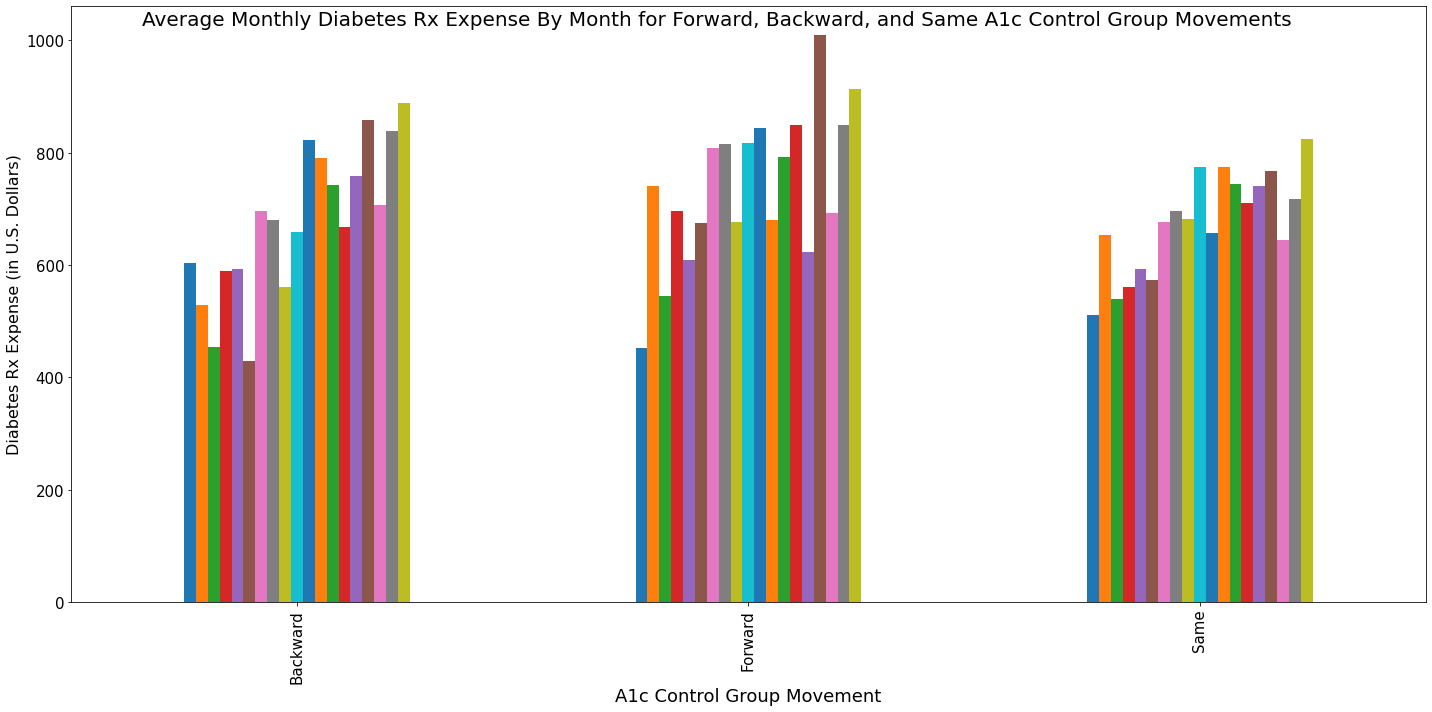

In [220]:
monthly = diabetes.groupby('Movement', as_index=True)['Net Pay Rx Diabetes Drugs July 2018', 'Net Pay Rx Diabetes Drugs August 2018', 'Net Pay Rx Diabetes Drugs September 2018', 'Net Pay Rx Diabetes Drugs October 2018', 'Net Pay Rx Diabetes Drugs November 2018', 'Net Pay Rx Diabetes Drugs December 2018', 'Net Pay Rx Diabetes Drugs January 2019', 'Net Pay Rx Diabetes Drugs February 2019', 'Net Pay Rx Diabetes Drugs March 2019', 'Net Pay Rx Diabetes Drugs April 2019', 'Net Pay Rx Diabetes Drugs May 2019', 'Net Pay Rx Diabetes Drugs June 2019', 'Net Pay Rx Diabetes Drugs July 2019', 'Net Pay Rx Diabetes Drugs August 2019', 'Net Pay Rx Diabetes Drugs September 2019', 'Net Pay Rx Diabetes Drugs October 2019', 'Net Pay Rx Diabetes Drugs November 2019', 'Net Pay Rx Diabetes Drugs December 2019', 'Net Pay Rx Diabetes Drugs January 2020'].mean()
plot = monthly.plot.bar(legend=None, figsize=(20,10), fontsize=15).get_figure()
plt.suptitle('Average Monthly Diabetes Rx Expense By Month for Forward, Backward, and Same A1c Control Group Movements', fontsize=20)
plt.xlabel('A1c Control Group Movement', fontsize=18)
plt.ylabel('Diabetes Rx Expense (in U.S. Dollars)', fontsize=16)
plt.tight_layout()

In [221]:
plot.savefig("monthly_control_expenses.png")

<ipython-input-222-8c3e7697b724>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthlyy = diabetes.set_index('Movement Group').loc[order].groupby('Movement Group', sort=False)['Net Pay Rx Diabetes Drugs July 2018', 'Net Pay Rx Diabetes Drugs August 2018', 'Net Pay Rx Diabetes Drugs September 2018', 'Net Pay Rx Diabetes Drugs October 2018', 'Net Pay Rx Diabetes Drugs November 2018', 'Net Pay Rx Diabetes Drugs December 2018', 'Net Pay Rx Diabetes Drugs January 2019', 'Net Pay Rx Diabetes Drugs February 2019', 'Net Pay Rx Diabetes Drugs March 2019', 'Net Pay Rx Diabetes Drugs April 2019', 'Net Pay Rx Diabetes Drugs May 2019', 'Net Pay Rx Diabetes Drugs June 2019', 'Net Pay Rx Diabetes Drugs July 2019', 'Net Pay Rx Diabetes Drugs August 2019', 'Net Pay Rx Diabetes Drugs September 2019', 'Net Pay Rx Diabetes Drugs October 2019', 'Net Pay Rx Diabetes Drugs November 2019', 'Net Pay Rx Diabetes Drugs December 2

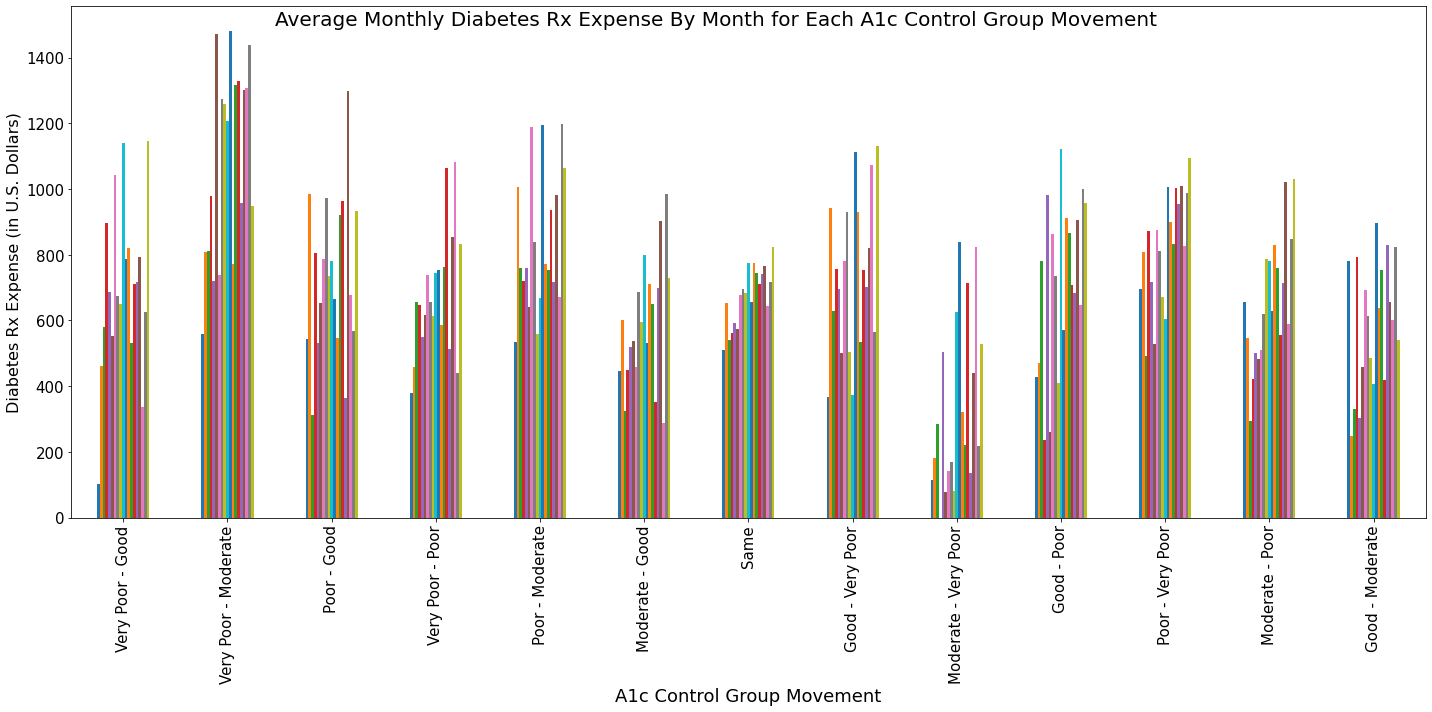

In [222]:
order = ['Very Poor - Good', 'Very Poor - Moderate', 'Poor - Good', 'Very Poor - Poor', 'Poor - Moderate', 'Moderate - Good', 'Same', 'Good - Very Poor', 'Moderate - Very Poor', 'Good - Poor', 'Poor - Very Poor', 'Moderate - Poor', 'Good - Moderate']
monthlyy = diabetes.set_index('Movement Group').loc[order].groupby('Movement Group', sort=False)['Net Pay Rx Diabetes Drugs July 2018', 'Net Pay Rx Diabetes Drugs August 2018', 'Net Pay Rx Diabetes Drugs September 2018', 'Net Pay Rx Diabetes Drugs October 2018', 'Net Pay Rx Diabetes Drugs November 2018', 'Net Pay Rx Diabetes Drugs December 2018', 'Net Pay Rx Diabetes Drugs January 2019', 'Net Pay Rx Diabetes Drugs February 2019', 'Net Pay Rx Diabetes Drugs March 2019', 'Net Pay Rx Diabetes Drugs April 2019', 'Net Pay Rx Diabetes Drugs May 2019', 'Net Pay Rx Diabetes Drugs June 2019', 'Net Pay Rx Diabetes Drugs July 2019', 'Net Pay Rx Diabetes Drugs August 2019', 'Net Pay Rx Diabetes Drugs September 2019', 'Net Pay Rx Diabetes Drugs October 2019', 'Net Pay Rx Diabetes Drugs November 2019', 'Net Pay Rx Diabetes Drugs December 2019', 'Net Pay Rx Diabetes Drugs January 2020'].mean()
monthlyy
plot1 = monthlyy.plot.bar(legend=None, figsize=(20,10), fontsize=15).get_figure()
plt.suptitle('Average Monthly Diabetes Rx Expense By Month for Each A1c Control Group Movement', fontsize=20)
plt.xlabel('A1c Control Group Movement', fontsize=18)
plt.ylabel('Diabetes Rx Expense (in U.S. Dollars)', fontsize=16)
plt.tight_layout()

In [223]:
plot1.savefig("monthly_control_expenses1.png")

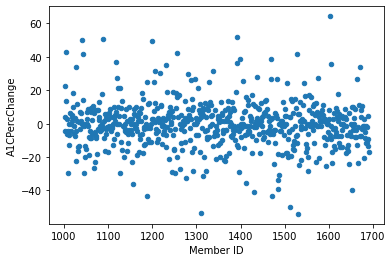

In [224]:

plot = diabetes.plot.scatter(x='Member ID', y='A1CPercChange')

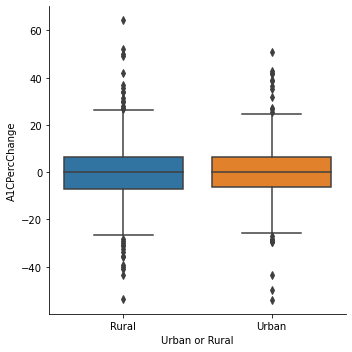

In [225]:
boxplot = sns.catplot(x="Urban or Rural", y="A1CPercChange", kind="box", data=diabetes)

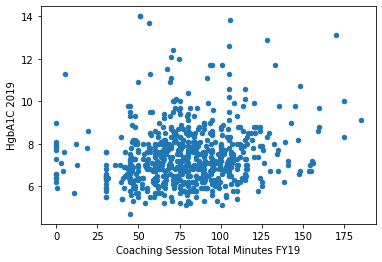

In [226]:
# example scatterplot using pandas

plot = diabetes.plot.scatter(x='Coaching Session Total Minutes FY19', y='HgbA1C 2019')

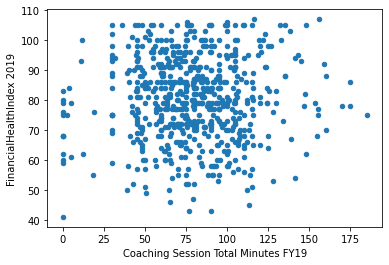

In [227]:
# example scatterplot using pandas

plot = diabetes.plot.scatter(x='Coaching Session Total Minutes FY19', y='FinancialHealthIndex 2019')

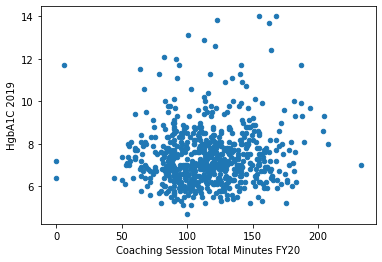

In [228]:
plot = diabetes.plot.scatter(x='Coaching Session Total Minutes FY20', y='HgbA1C 2019')

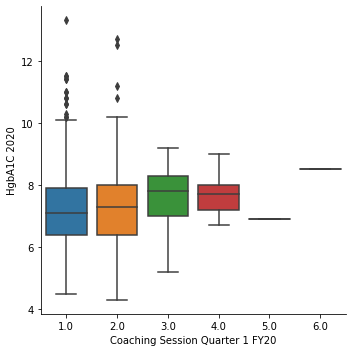

In [229]:
boxplot = sns.catplot(x="Coaching Session Quarter 1 FY20", y="HgbA1C 2020", kind="box", data=diabetes)

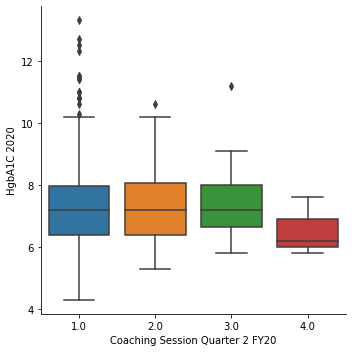

In [230]:
# example boxplot using seaborn library

boxplot = sns.catplot(x="Coaching Session Quarter 2 FY20", y="HgbA1C 2020", kind="box", data=diabetes)

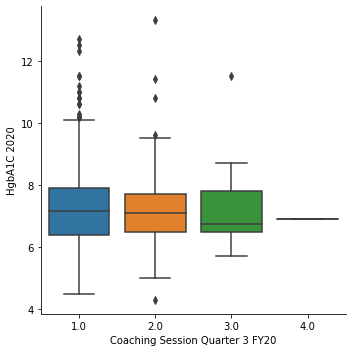

In [231]:
boxplot = sns.catplot(x="Coaching Session Quarter 3 FY20", y="HgbA1C 2020", kind="box", data=diabetes)

In [232]:
diabetes.plot.pie(subplots=True,figsize=(8, 3))

ValueError: fill value must be in categories

<font size="20">Statistical Models</font>

In [ ]:
diabetes['Coaching Session Total Minutes FY19'] = diabetes['Coaching Session Total Minutes FY19'].fillna((diabetes['Coaching Session Total Minutes FY19'].mean()))

In [ ]:
diabetes['Coaching Session Total Minutes FY19'].isnull().sum()

In [ ]:
X = diabetes["Coaching Session Total Minutes FY19"]
y = diabetes["HgbA1C 2019"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

In [ ]:
model.plot()

In [ ]:
ax.plot(X, y_pred, '-', color='darkorchid', linewidth=2)